As a fan of the English Premier League, I have watched closely as the power dynamic changed at the top end of the table in the last few years. For a while there was a hegemony between Manchester City and Liverpool, with the two clubs fighting for the title for years. They were far and away the two best teams in the league, collecting over 90 points per season on multiple occasions. For perspective, the two teams reached 100 points(City), 99 points(Liverpool), 98 points(City), 97 points(Liverpool) between 2018 and 2020, no other team in the history of the league has more than 95 points a season. To say the standard was very high would be an understatement. 
It is for this reason that it is fascinating that Arsenal were able to join the party and make it a big 3 the last two years. To be sure, Liverpool were well behind Arsenal and Manchester City in 2022-2023 but they returned to the party in 2023-2024. I want to take a look at how Arsenal managed to climb up the table and end up being title contenders, and whether they can get over the line and be champions. In particular I will be looking at expected goals(xG), expected goals against(xGA) and expected goal dfference(xGD). The reason I chose these data points is that the whole point of soccer is to score more that the opponent, so if a team consistently outscores their opponents they are more likely to end up being champions. As for using expected goals, I believe that the actual goal scored includes more randomness than the expected goal, therefore expected goals tells us more about a team's ability to consistently create good goal scoring opportunities.

First, I will install the neccessary libraries, namely boto3 for AWS access where I am storing the data I collected and seaborn for visualization. I am going to exclude my AWS credentials as that part is a different project that I am keeping private at this time.

In [2]:
pip install boto3

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn 

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [84]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn.objects as so
import seaborn as sns
import pandas as pd 
import boto3
import io

In [5]:
aws_s3_bucket = ''

s3_client = boto3.client(
        's3',
        aws_access_key_id='',
        aws_secret_access_key='')

read_response = s3_client.get_object(Bucket=aws_s3_bucket, Key='.csv')

top_five_leagues = pd.read_csv(io.BytesIO(read_response['Body'].read()))

top_five_leagues.head()

,league,season,team,players_used_,Age_,Poss_,Playing Time_MP,Playing Time_Starts,Playing Time_Min,Playing Time_90s,...,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer
0,ENG-Premier League,2019-2020,Arsenal,29,25.8,53.8,38,418,3420,38.0,...,8,56,1.47,47.0,55.3,-8.3,-0.22,NaN,47589.0,Pierre-Emerick Aubameyang - 22
1,ENG-Premier League,2019-2020,Arsenal,29,25.8,53.8,38,418,3420,38.0,...,8,56,1.47,47.0,55.3,-8.3,-0.22,NaN,47589.0,Pierre-Emerick Aubameyang - 22
2,ENG-Premier League,2019-2020,Aston Villa,28,25.7,44.1,38,418,3420,38.0,...,-26,35,0.92,44.3,67.8,-23.5,-0.62,NaN,28505.0,Jack Grealish - 8
3,ENG-Premier League,2019-2020,Aston Villa,28,25.7,44.1,38,418,3420,38.0,...,-26,35,0.92,44.3,67.8,-23.5,-0.62,NaN,28505.0,Jack Grealish - 8
4,ENG-Premier League,2019-2020,Bournemouth,27,25.2,44.1,38,418,3420,38.0,...,-25,34,0.89,44.8,62.3,-17.5,-0.46,NaN,7745.0,Callum Wilson - 8


In [6]:
top_five_leagues['season'].unique()

array(['2019-2020', '2020-2021', '2021-2022', '2022-2023', '2023-2024',
       '2024-2025'], dtype=object)

In [23]:
df = top_five_leagues[top_five_leagues['season'].isin(['2019-2020', '2020-2021', '2021-2022', '2022-2023', '2023-2024'])]
epl = df[df['league']=='ENG-Premier League']
epl_top3 = epl[epl['team'].isin(['Arsenal', 'Liverpool', 'Manchester City'])]

In [20]:
df_curr_szn = top_five_leagues[top_five_leagues['season']=='2024-2025']
epl_curr_szn = df_curr_szn[df_curr_szn['league']=='ENG-Premier League']
epl_top3_curr_szn = epl_curr_szn[epl_curr_szn['team'].isin(['Arsenal', 'Liverpool', 'Manchester City'])]

df_curr_szn['league'].unique()

array(['ENG-Premier League', 'ESP-La Liga', 'FRA-Ligue 1',
       'GER-Bundesliga', 'ITA-Serie A'], dtype=object)

In [85]:

so.Plot.config.theme.update(mpl.rcParams)

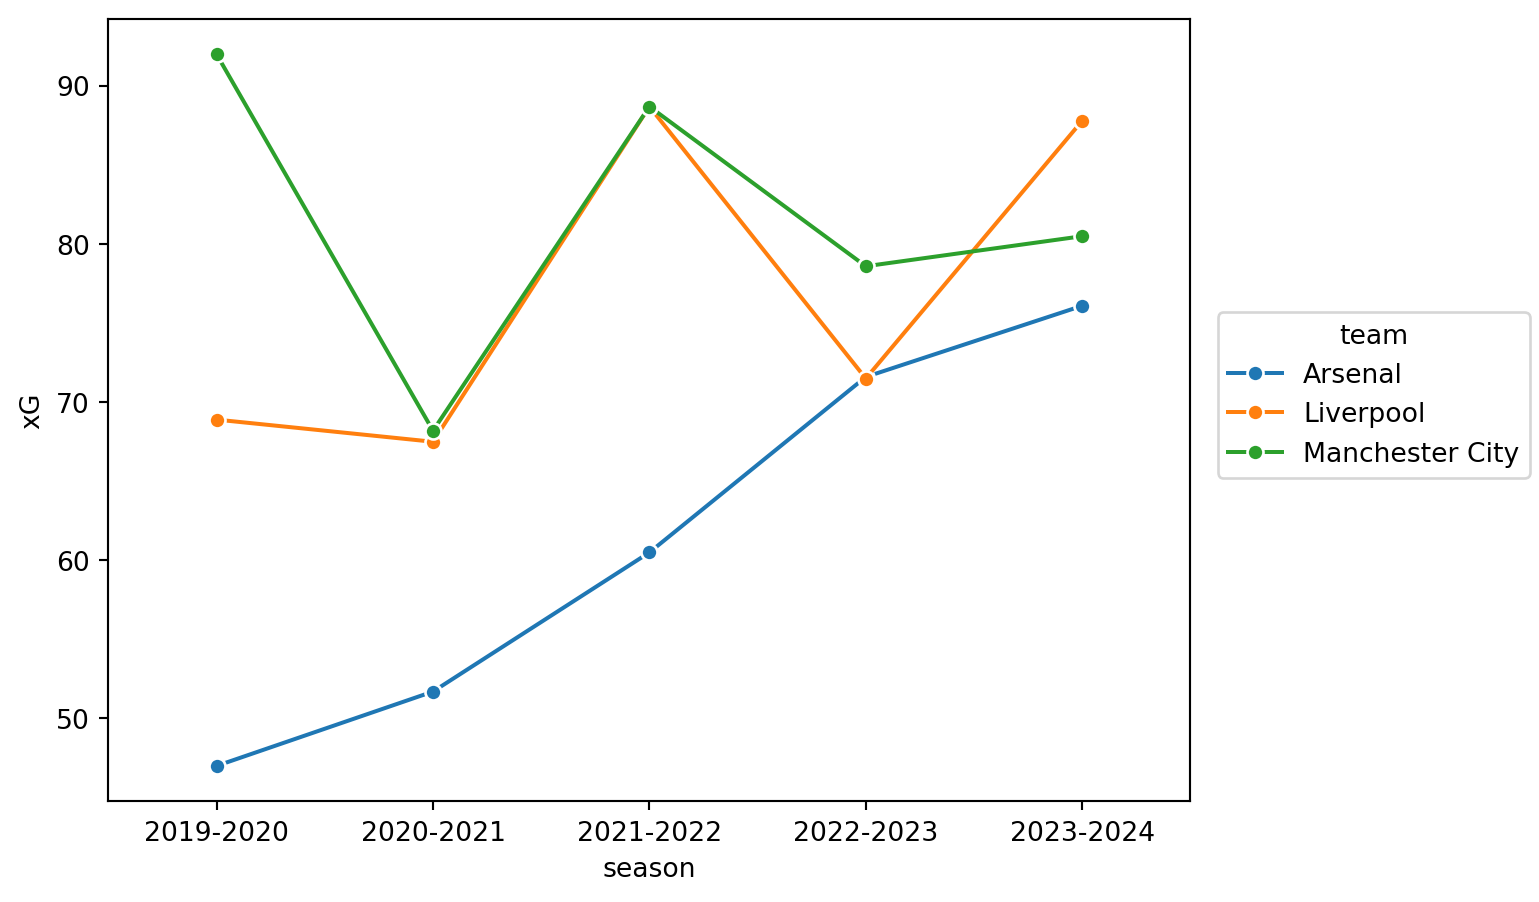

In [86]:
p = so.Plot(epl_top3, x='season', y='xG', color='team')
p.add(so.Line(), so.Agg())
p.add(so.Line(marker="o", edgecolor="w"), so.Agg(), linestyle=None)


The first thing we can see when looking at expected goals is how Arsenal closed the gap with the two conteders over a period 4 seasons to eventually be within touching distance, practically matching Liverpool in 2022-2023. However, we can also see that despite Arsenal being the main competitor to Manchester City in the last two seasons, they are still unable to match not just City but also Liverpool in consistently creating goal scoring opportunities. This tells us there must be something else they are doing better than Liverpool in particular to finish ahead of them in 2022-2023 and 2023-2024. With that in mind, we are going to explore the 3 teams defenses using expected goals against(xGA)

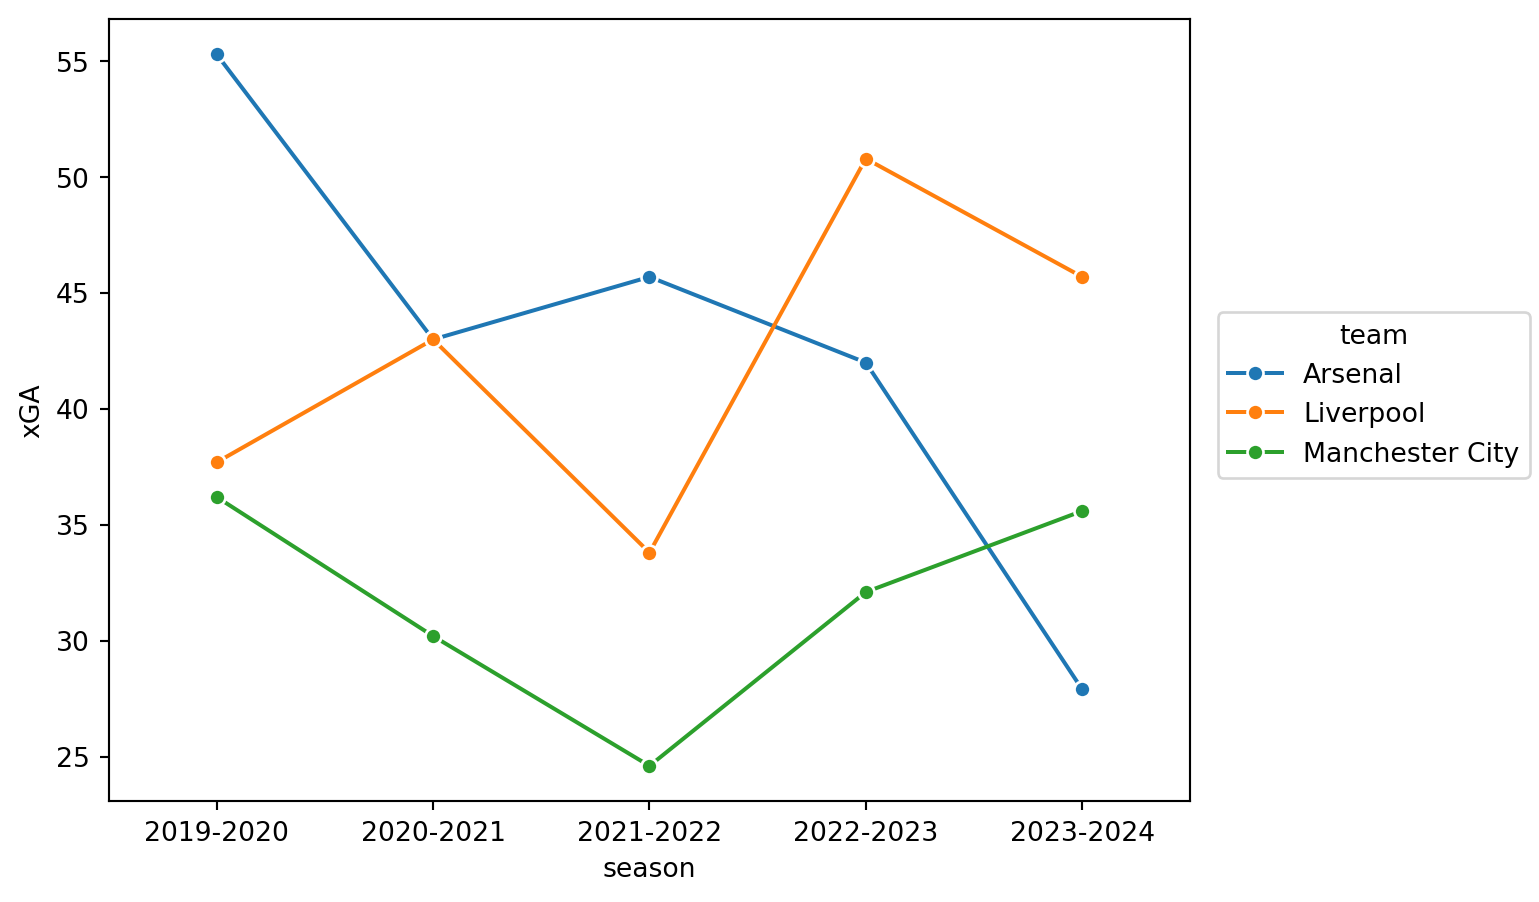

In [87]:
p = so.Plot(epl_top3, x='season', y='xGA', color='team')
p.add(so.Line(), so.Agg())
p.add(so.Line(marker="o", edgecolor="w"), so.Agg(), linestyle=None)

What we can see in this plot is that Arsenal have done much better than Liverpool in terms of preventing goals in the last two seasons, and better than City last season. This explains why despite being behind the other two in creating goals, Arsenal have managed to be a serious title challenger for two years. To further examine that point we can look at expected goal difference(xG-xGA).

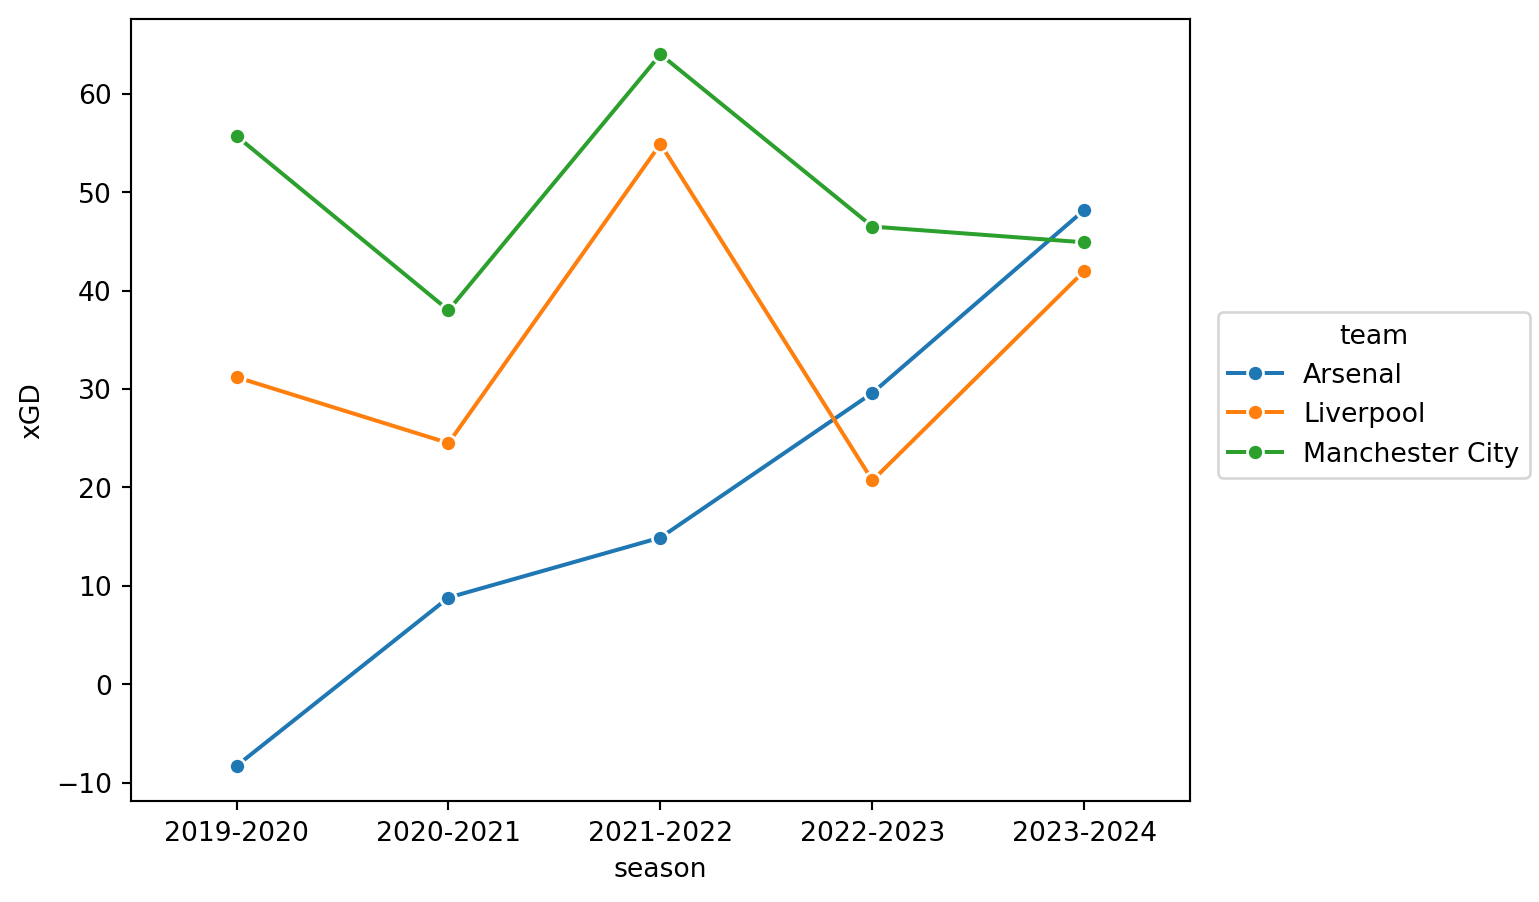

In [88]:
p = so.Plot(epl_top3, x='season', y='xGD', color='team')
p.add(so.Line(), so.Agg())
p.add(so.Line(marker="o", edgecolor="w"), so.Agg(), linestyle=None)

This plot shows that expected goal difference(xGD) is the area Arsenal have improved in significantly year over years, thanks to their ability to prevent goals being scored against them. In many ways, this is the area where a team should focus on beating everyone in order to have a greater chance of winning the league, as shown by Arsenal only missing out on the league by two points in the year that they had the best xGD. This calls into question what Arsenal have to do next in order to get over the line. Before I go into that let us look at the current season to see where Arsenal stand in xG, xGA and xGD.

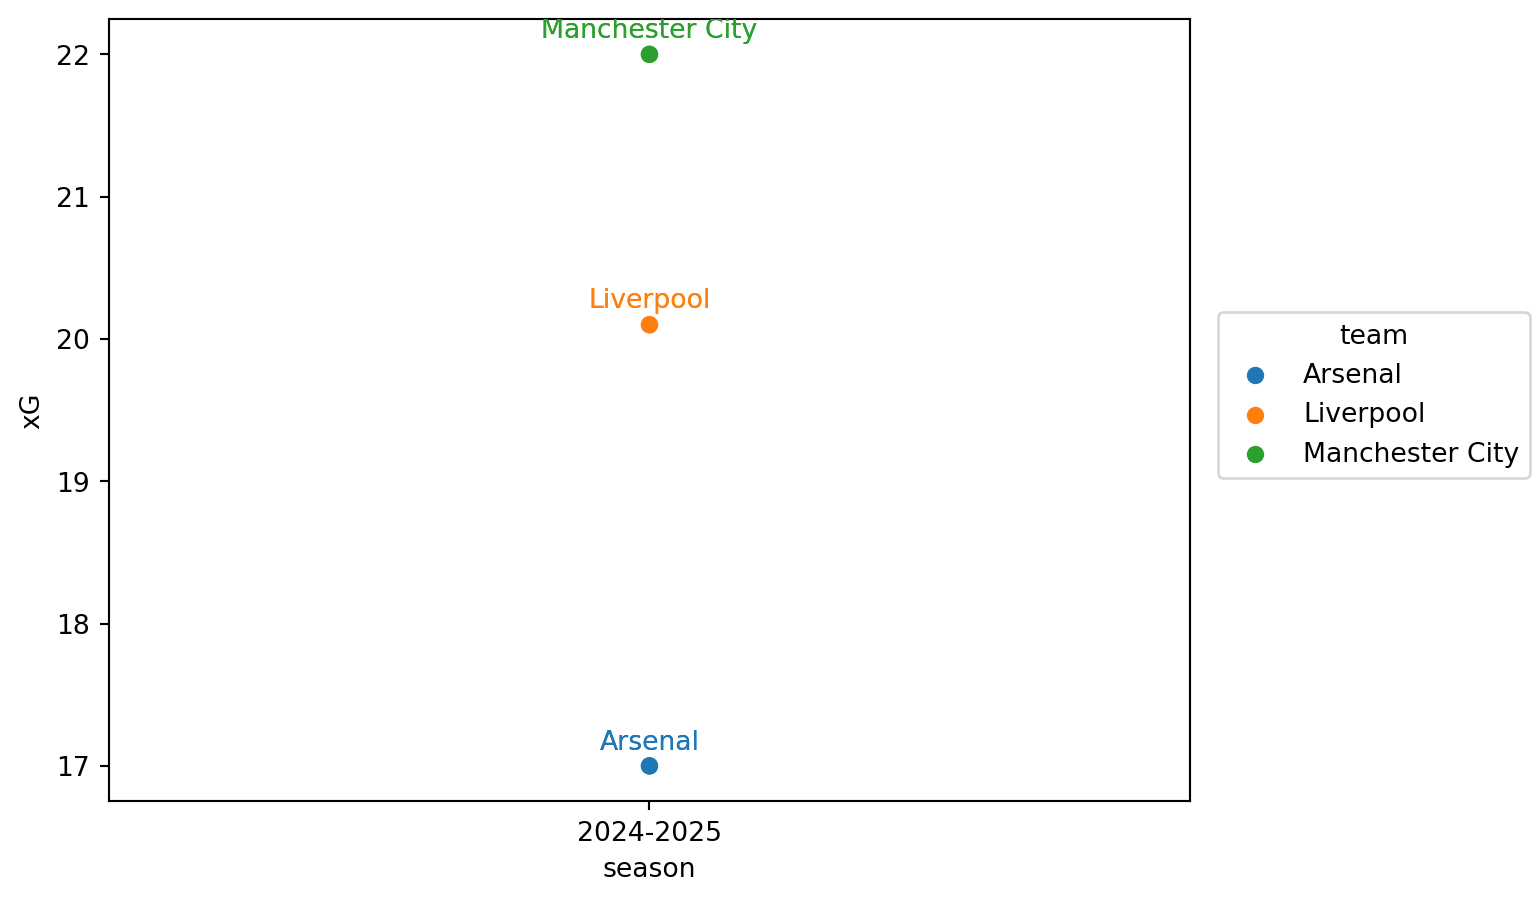

In [44]:
(
    so.Plot(epl_top3_curr_szn, x='season', y='xG', text='team', color='team')
    .add(so.Text(valign='bottom')).add(so.Dot())
)

We can see that Arsenal are still way behind in expected goals, so the trend from recent years is not changing, based on the data. This means that they have to at the very least replicate their defensive data from last season to have a chance to win the league. 

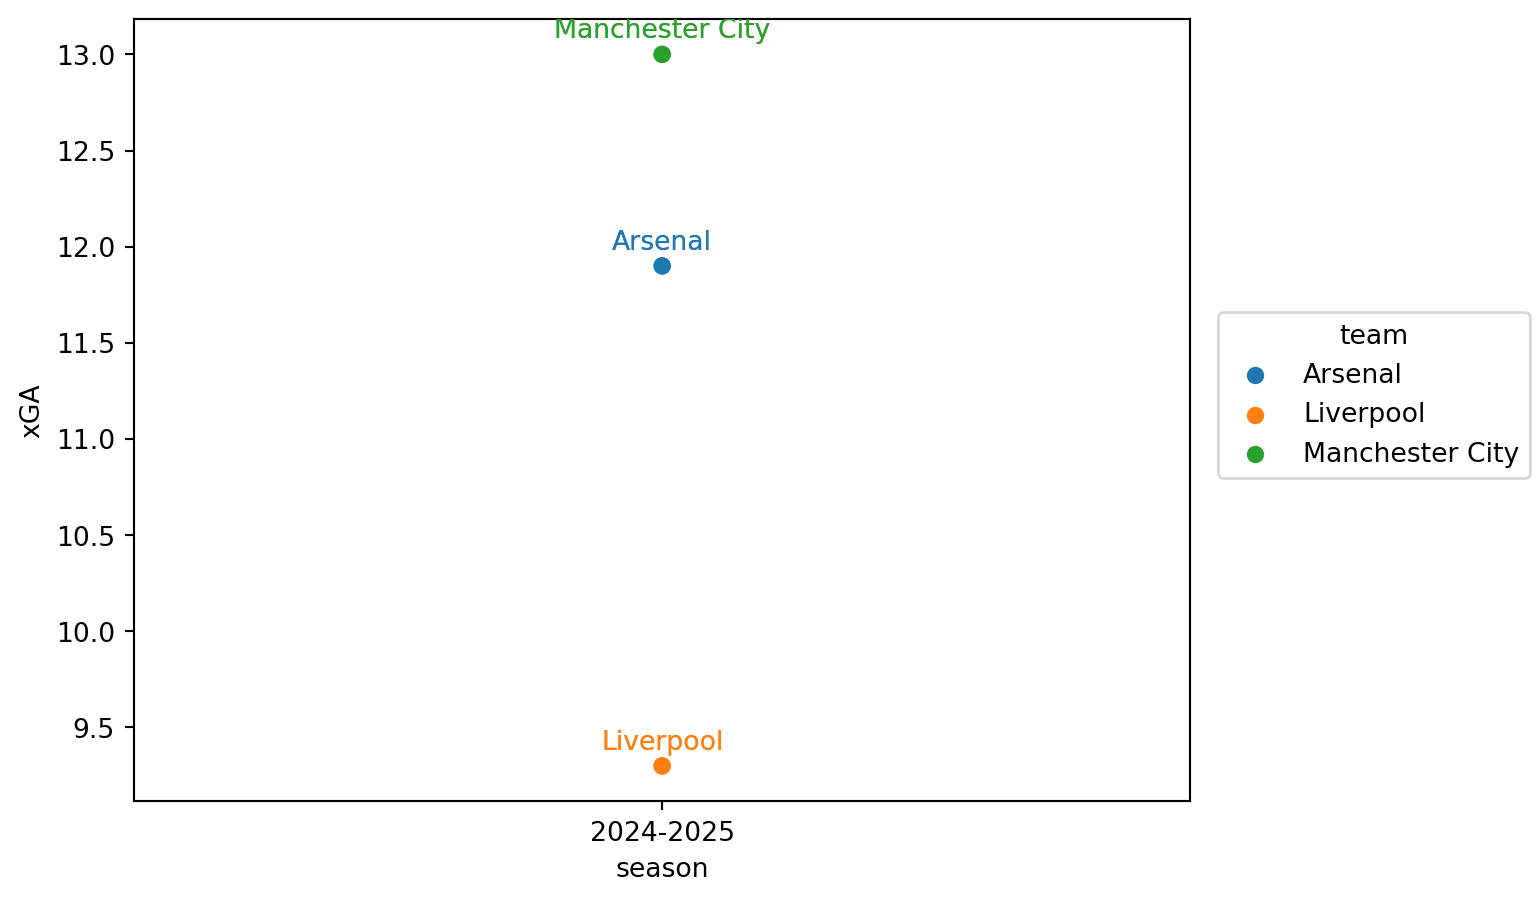

In [48]:
(
    so.Plot(epl_top3_curr_szn, x='season', y='xGA', text='team', color='team')
    .add(so.Text(valign='bottom')).add(so.Dot())
)

Looking at expected goals against, Arsenal are doing worse than Liverpool and slightly better than City. This is not a good sign for Arsenal as this is a data point that allowed them to be serious contenders, and we already explained why they need to maintain or improve it in order to win the title.

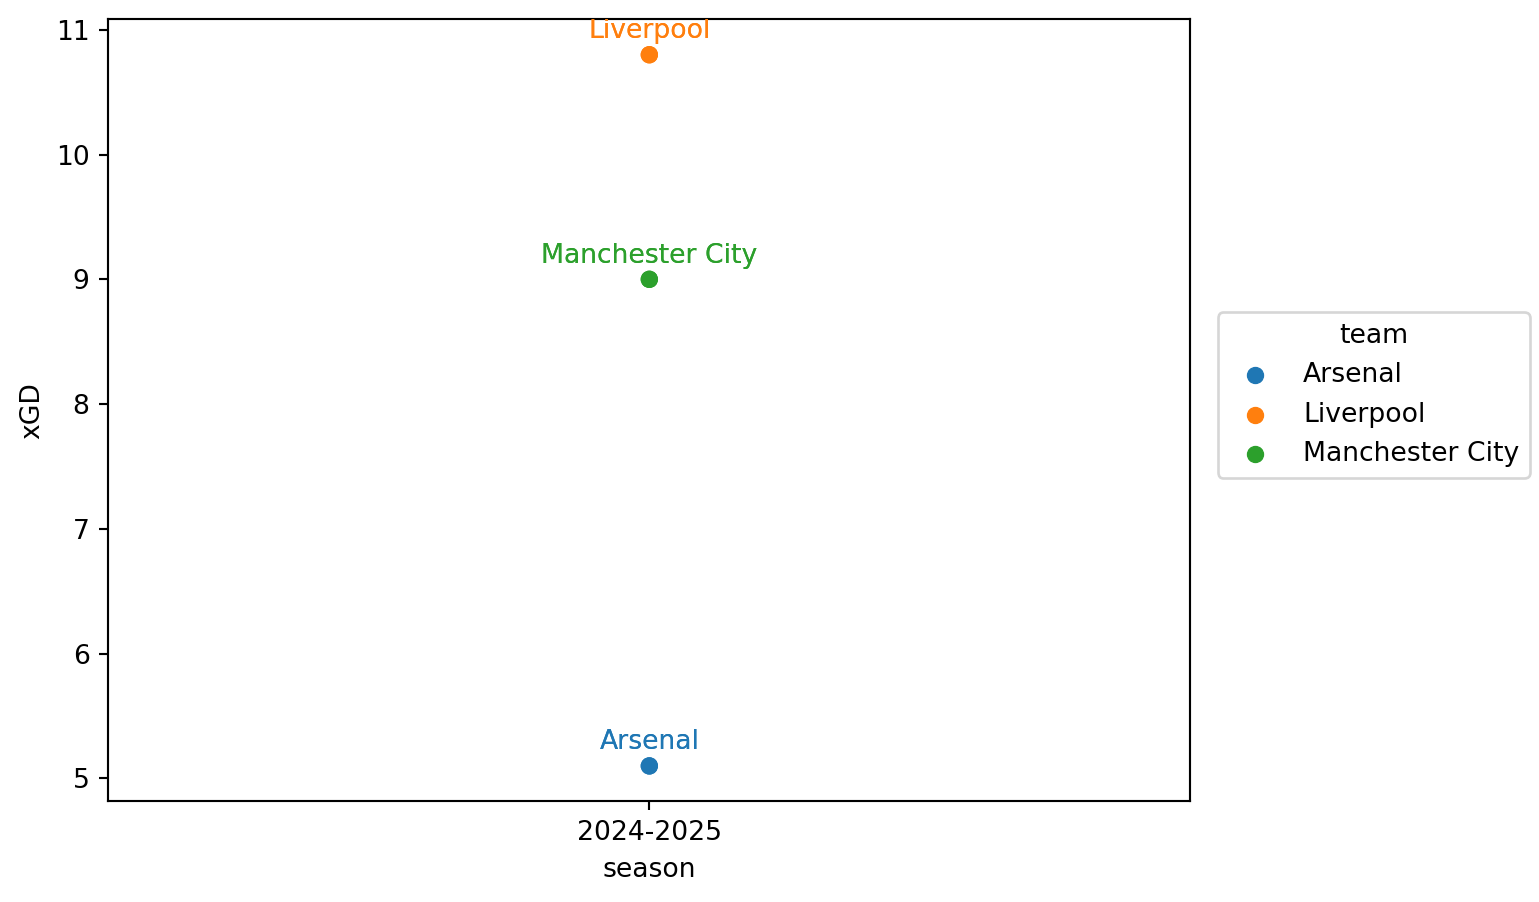

In [80]:
(
    so.Plot(epl_top3_curr_szn, x='season', y='xGD', text='team', color='team')
    .add(so.Text(valign='bottom')).add(so.Dot())
)

Lastly, looking at xGD, it is clear that Arsenal are not trending in a positive direction this season, and if they want to win the league they have to improve massively. We already know that their best chance is having the best defense, therefore this is the area we can safely predict they are most likely to improve significantly on to contend again. They do not have the track record to perform better than their rivals in creating goals so we can safely expect that not to improve significantly. 

Now, time for some observations about the direction Arsenal are going and whether it can yield the desired results for them. In the old days they used to say 'attack wins you games and defense wins you titles'. If this remained true Arsenal would be in the best position to win multiple titles. However, the evidence suggests that in the modern game the best chance at winning titles comes via being consistently the best offensive machine. Based on the data and transfer activity of Arsenal, it seems their manager has made the bet that they can win the title through defense. Whether they can do that remains to be seen, but my observation and recent history suggests that is the hardest way to try and win a league title. The reason for this is that for a team to remain the best defensively relies to a greater extent on the teams on the opposite end. If teams have good players chances are they will have a couple of opportunities to score during the game, regardless of how well drilled the defense is. At that point randomness plays a bigger part in the outcome, and if the role of coaching is to eliminate randomness as much as possible, focusing on a defense oriented style is less likely to consistently yield the desired results. In short, by focusing on defense, the Arsenal management is giving away controll of the outcome more than those managers whose teams are built to maximize attack first and foremost. 
It will be interesting to see how the season progresses and indeed future seasons. I will be following closely and going throuth the data to see if anything changes.